# Authentication and Configuration

In [1]:
#importing libs for woking with colab+google drives
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#creating objects of libs
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# defineing a loader function for imporving modularity 
def load_file_from_drive(id, name):
    downloaded = drive.CreateFile({'id':id})
    downloaded.GetContentFile(name)
    

In [3]:
#loading dependencies with their flies links 

# https://drive.google.com/file/d/1oHZ63IjcUpQ8eW-MNFcxovP1mp3l-mSH/view?usp=sharing
load_file_from_drive('1oHZ63IjcUpQ8eW-MNFcxovP1mp3l-mSH', 'Moives_TV_First100K.json')

#wn_affect.py: https://drive.google.com/file/d/1NLdqCDP8R_0WUhXs9Hm6EqA5VR6GGh4L/view?usp=sharing  
load_file_from_drive('1NLdqCDP8R_0WUhXs9Hm6EqA5VR6GGh4L', 'wn_affect.py')

# stop_words_list.py : https://drive.google.com/file/d/1jvfTaa_IIAMWPcawcBmoAxloNo6SSFVZ/view?usp=sharing
load_file_from_drive('1jvfTaa_IIAMWPcawcBmoAxloNo6SSFVZ', 'stop_words_list.py')

In [5]:
print("linst of available files:\t")
!ls
print("\ncurrent directory:")
!pwd

linst of available files:	
adc.json		  __pycache__  sentiment_analysis.png  wn_affect.py
Moives_TV_First100K.json  sample_data  stop_words_list.py

current directory:
/content


# importing Libs

#Disclimirimination (Possibility of getting error in importing libs & How to fix that)

If you got following warnnings, you just need to restart "runtime" on your google colab

```
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
Installing collected packages: funcy, numpy, pandas, pyLDAvis
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
Successfully installed funcy-1.16 numpy-1.20.3 pandas-1.2.4 pyLDAvis-3.3.1
WARNING: The following packages were previously imported in this runtime:
  [numpy,pandas]
You must restart the runtime in order to use newly installed versions.
```


In [9]:
# !pip list
#nupmy.__version__ 


In [8]:
''' format: lib's name, usecase '''
import json  # loading json files
import re # cleaning data
import string # cleaning data 
import nltk  # cleaning data 
nltk.download('stopwords') # cleaning data 
stopwords = nltk.corpus.stopwords.words('english') # cleaining data 
nltk.download('punkt') # for tokennizer fucntion we need it
nltk.download('wordnet') # for lemmetizing we need this 

nltk.download('averaged_perceptron_tagger')# needed in textblob method
from nltk import PorterStemmer # stemming in cleaning part 
ps = PorterStemmer() # func for cleaning data
from textblob import TextBlob # unsuper sentiment analyzing 
## Perfect resource for checking textblob lib capability :
## https://textblob.readthedocs.io/en/dev/quickstart.html
## textblob vs vaderSent: https://www.youtube.com/watch?v=qTyj2R-wcks
!pip install vaderSentiment # another tool for sentiment analyzing. it's like textblob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd # for creating data frame
import numpy as np # for processing data 
import sys
#from nltk.corpus import stopwords, sentiwordnet as swn #temporary  commenting 
from nltk.stem import WordNetLemmatizer # lemmetizing 
from nltk import ngrams 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation #LDA
import collections
#from stop_words_list import stop_words_list
#from wn_affect import wn_affect 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words_list import stop_words_list #In movie reviews we need these more stopword
from wn_affect import wn_affect # More stopwords 
import random # randomly selecting reviews for creaing testset
import pickle # saving models 
# Roozbeh added libraries
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest

# evaluation of LDA
!pip install pyLDAvis 
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [10]:
# Extra stop_words specific to Movie category
print(wn_affect)
print(stop_words_list)

['abash', 'abashed', 'abashment', 'abhor', 'abhorrence', 'abhorrent', 'abject', 'abjectly', 'abominably', 'abominate', 'abomination', 'acceptance', 'accomplished', 'admirable', 'admirably', 'admiration', 'admire', 'adorably', 'adoration', 'adore', 'adoring', 'affect', 'affection', 'affectional', 'affectionate', 'affectionateness', 'affective', 'affright', 'afraid', 'aggravate', 'aggravated', 'aggravation', 'aggression', 'aggressive', 'aggressiveness', 'aggrieve', 'agitate', 'agitated', 'agitation', 'alarmed', 'alert', 'alien', 'alienate', 'alienated', 'alienation', 'allay', 'aloofness', 'amative', 'amatory', 'amaze', 'amazed', 'amazement', 'amazing', 'amazingly', 'ambiguous', 'ambiguous-fear', 'amicability', 'amicable', 'amicableness', 'amicably', 'amok', 'amorous', 'amorousness', 'amour-propre', 'amuck', 'amused', 'amuse', 'amusement', 'amusing', 'anger', 'angered', 'angrily', 'angry', 'angst', 'anguished', 'animosity', 'animus', 'annoy', 'annoyance', 'annoyed', 'annoying', 'anomic', 

# Preprocessing Data set
( uploading, cleaning, and creating dataframe)

In [11]:
data = json.load(open('Moives_TV_First100K.json'))
# test = json.load(open('Test1000.json'))

numberOftrain = 50000 # How many data to train
numberOftest = 1000 # How many data to test

alldata_index = random.sample(range(len(data)), numberOftrain + numberOftest)
testdata_index = random.sample(alldata_index, numberOftest)

scores =[]
reviews = []
verified = []
vote = []
testScores = []
testReviews = []
testverified = []
testvote = []

for i in alldata_index:
  if data[i].__contains__('overall') and data[i].__contains__('reviewText') and data[i].__contains__('verified'):
    if i in testdata_index:
      testScores.append(int(data[i]['overall']))
      testReviews.append(data[i]['reviewText'])
      if data[i]['verified']:
        testverified.append(1)
      else:
        testverified.append(0)
      if data[i].__contains__('vote'):
        testvote.append(int(data[i]['vote'].replace(',', '')))
      else:
        testvote.append(1)
    
    else:
      scores.append(int(data[i]['overall']))
      reviews.append(data[i]['reviewText'])
      if data[i]['verified']:
        verified.append(1)
      else:
        verified.append(0)
      if data[i].__contains__('vote'):
        vote.append(int(data[i]['vote'].replace(',', '')))
      else:
        vote.append(1)


print('Size of train set: ', len(scores)) # Scores frequency is highly skewed
print('Size of test set: ', len(testScores))
scores_freq = {x:scores.count(x) for x in set(scores)}
print('Frequency of each rating in trainset: ', scores_freq)
scores_freq_test = {x:testScores.count(x) for x in set(testScores)}
print('Frequency of each rating in testset: ', scores_freq_test)

Size of train set:  49960
Size of test set:  1000
Frequency of each rating in trainset:  {1: 2531, 2: 1507, 3: 3016, 4: 7461, 5: 35445}
Frequency of each rating in testset:  {1: 41, 2: 34, 3: 60, 4: 155, 5: 710}


In [12]:
# Creating dataframe and fillind it
df = pd.DataFrame(reviews, columns =['reviews'])
display(df)

,reviews
0,This movie is the story of a creature that tim...
1,My daughter loves the movies!!!
2,DIFFICULT TO BELIEVE ! THE CHILD THEY LOST 10 ...
3,my 3 year old watches this over and over. this...
4,Great. A+
...,...
49955,I cried when Old Yeller died!
49956,Good movie. Recommended to anyone.
49957,"American Beauty is not regular beauty, it is d..."
49958,"This film, perhaps Spielberg's best among his ..."


In [13]:
test = ['a','b','c']
test = test + ['d']
print(test)

['a', 'b', 'c', 'd']


In [14]:
print(stopwords ,"\n",len(stopwords))
stopwords = stopwords + stop_words_list + wn_affect
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Apply text cleaning techniques

def textCleaner(text):
    ''' removing all URLs '''
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    '''Get rid of some additional punctuation and non-sensical text that was missed the previous subroutines.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    ''' Removing stop words '''
    tokens = text.split(" ")
    cleanedText = ""
    for token in tokens:
      if(token not in stopwords):
        cleanedText += (token + " ")
    text = cleanedText 
    ''' Stemming '''
    tokens = text.split(" ")
    cleanedText=""
    for tok in tokens:
      cleanedText += (ps.stem(tok) + " ")
    text = cleanedText


    return text

# cleaner = lambda x: textCleaning(x)

In [16]:
print(textCleaner(reviews[0]))# frist review after cleaning

movi stori creatur time forgot greddi men leav creatur lone underwat shot movi  


In [17]:
#cleaning reviews
clean_reviews = []
for review in reviews:
  clean_reviews.append(textCleaner(review))
print(len(clean_reviews))

49960


In [18]:
#updating dataframe 
df['cleaned_and_tokenised'] = clean_reviews
# case text as lowercase, remove punctuation, remove extra whitespace in string and on both sides of string
# further cleaning ### merge following proccess with the textCleaning fucn
df['cleaned_and_tokenised'] = df['cleaned_and_tokenised'].str.lower().str.replace("'", '').str.replace(r'[^\w\s]', ' ').str.replace(r" \d+", " ").str.replace(' +', ' ').str.strip()
df['cleaned_and_tokenised'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1) #  Row[1] is " removeLowerPunct "  column
wordnet_lemmatizer = WordNetLemmatizer() # initiate nltk lemmatiser
df['lemmatise'] = df['cleaned_and_tokenised'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) # lemmatise words
display(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,reviews,cleaned_and_tokenised,lemmatise
0,This movie is the story of a creature that tim...,"[movi, stori, creatur, time, forgot, greddi, m...","[movi, stori, creatur, time, forgot, greddi, m..."
1,My daughter loves the movies!!!,"[daughter, love, movi]","[daughter, love, movi]"
2,DIFFICULT TO BELIEVE ! THE CHILD THEY LOST 10 ...,"[difficult, child, lost, year, ago, leav, bloc...","[difficult, child, lost, year, ago, leav, bloc..."
3,my 3 year old watches this over and over. this...,"[year, watch, favorit, movi, good, plot, learn...","[year, watch, favorit, movi, good, plot, learn..."
4,Great. A+,[],[]
...,...,...,...
49955,I cried when Old Yeller died!,"[cri, yeller, die]","[cri, yeller, die]"
49956,Good movie. Recommended to anyone.,"[good, movi, recommend]","[good, movi, recommend]"
49957,"American Beauty is not regular beauty, it is d...","[american, beauti, regular, beauti, deceit, si...","[american, beauti, regular, beauti, deceit, si..."
49958,"This film, perhaps Spielberg's best among his ...","[film, spielberg, best, entertain, fair, essen...","[film, spielberg, best, entertain, fair, essen..."


In [19]:
# count vectorizer 
# we need this for LDA model and maybe for DL method 

# initialise the count vectorizer
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1, 2)) #(1,2): using both monogram and bigrams
# join the processed data to be vectorised
vectors = []
for index, row in df.iterrows():
    vectors.append(", ".join(row[2])) # lemmatize column
vectorised = vectorizer.fit_transform(vectors)

# Phase 1 , Unsupervised sentiment analysis

## Textblob method

### introduction


In [20]:
TextBlob("realli happi got evangelis  spoiler alerthappi end like thatsinc start bit worrisom yeah great stori missionari movi ").sentiment
TextBlob("the price of BTC is increasing ").sentiment.polarity
print(TextBlob("the price of BTC is increasing ").tags)

## Using TextBlob functions on reviews 
''''important note: 'score' list means overall score of reviews in our dataset and score_textblob is estimated SENTIMENT scores of reviews by textblob func''' 
score_txtblob = [] # sentiment score results of Textblob lib (-1< score <+1)
label_txtblob = [] # Lable = negative, nuetral, positive
rate_txtblob_linear = [] # {1,2,3,4,5} using linear mapping 
rate_txtblob_nonlin = [] # {1,2,3,4,5} using non linear mapping 
ln = 0 #lenght

dataSet_ratings_freq = {x:scores.count(x) for x in set(scores)}
rate_txtblob_linear_freq = {} #{'1':0,'2':0,'3':0,'4':0,'5':0}
rate_txtblob_nonlin_freq = {} #{'1':0,'2':0,'3':0,'4':0,'5':0}

print("dataSet_ratings_freq:\n",dataSet_ratings_freq,"\nrate_txtblob_linear_freq:\n",rate_txtblob_linear_freq,"\nrate_txtblob_nonlin_freq:\n",rate_txtblob_nonlin_freq)

[('the', 'DT'), ('price', 'NN'), ('of', 'IN'), ('BTC', 'NNP'), ('is', 'VBZ'), ('increasing', 'VBG')]
dataSet_ratings_freq:
 {1: 2531, 2: 1507, 3: 3016, 4: 7461, 5: 35445} 
rate_txtblob_linear_freq:
 {} 
rate_txtblob_nonlin_freq:
 {}


### finding score with Textblob 

In [21]:
print(len(reviews))

49960


In [22]:
lll = len(reviews)
score_txtblob = [0]*lll
i=0
for review in reviews:
  score_txtblob[i]=round(TextBlob(review).sentiment.polarity, 3)
  i+=1

print(score_txtblob)
ln = len(score_txtblob)
print(ln)

[0.8, 0.0, -0.327, 0.32, 0.8, 0.537, 0.284, 0.005, 0.5, 0.222, 0.35, 0.116, 0.267, 0.148, 1.0, 0.316, 0.133, 0.457, 0.55, 0.607, 0.358, 1.0, 0.088, 0.333, 1.0, 0.5, 0.7, 0.284, 0.05, 0.274, 0.48, 0.5, 0.087, 0.8, 1.0, 1.0, 1.0, 0.337, 0.44, 0.8, 0.0, 0.133, 0.253, 0.15, 0.243, 0.167, 0.85, 0.5, 0.021, 0.05, -0.001, 0.5, 0.0, 1.0, 0.383, 0.775, 0.447, 0.1, 0.504, -0.041, 0.399, 1.0, -0.06, 0.655, 0.413, 0.75, 0.65, 0.458, 0.45, 1.0, 0.244, 0.25, 0.0, 0.7, -0.053, 0.8, 0.375, 0.217, 0.6, -0.006, 0.25, 0.34, -0.8, 0.567, 0.083, 0.5, 0.167, 0.35, 0.393, 0.177, 0.0, 0.027, 0.361, 0.364, 0.352, 0.91, 0.286, 0.26, 0.8, 1.0, 0.308, 0.0, 0.556, 0.281, 0.8, -0.111, 0.117, 0.0, 0.229, 0.422, 0.517, 0.324, 0.108, 0.625, 0.0, 0.054, 0.145, 0.165, 0.5, 0.433, 0.4, 0.326, 0.6, 0.271, 0.65, 0.253, 0.105, 0.7, 0.222, -0.041, 0.333, 0.113, 0.186, 0.2, 0.028, 0.185, 0.7, 0.282, 0.551, 0.8, 0.669, 0.39, 0.138, 0.172, 0.0, 0.333, 0.211, 0.75, 0.263, 0.1, 0.077, 0.211, 0.413, 0.8, 0.416, 0.471, 0.8, 0.5, 0.

### Finding lable with Textblob

In [23]:
label_txtblob =[' ']*ln 
for i in range(ln):  
    if score_txtblob[i] >= 0.05:
        label_txtblob[i]= 'Positive'
    elif score_txtblob[i] > -0.05 and score_txtblob[i] < 0.05:
        label_txtblob[i]= 'Neutral'
    elif score_txtblob[i] <= -0.05:
        label_txtblob[i]= 'Negative'


In [24]:
print(label_txtblob)

['Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Positive', 

### Finding rating with Textblob

In [25]:
rate_txtblob_linear =[0]*ln
rate_txtblob_nonlin =[0]*ln

# _____________ Linear mapping Scores: from [-1,1] to {1,2,3,4,5}____________#
f = lambda x: round((2*x)+3)
for i in range(ln):
  rate_txtblob_linear[i]= f(score_txtblob[i])
print("Linear mapping:\n",rate_txtblob_linear)

rate_txtblob_linear_freq = {x:rate_txtblob_linear.count(x) for x in set(rate_txtblob_linear)}
#NonLinear mapping Scores:from[-1,1]to{1,2,3,4,5}, with respect to scores frequency

## Developing better mapping with respect to the scores frequency :
print(dataSet_ratings_freq, type(dataSet_ratings_freq))
sq = dataSet_ratings_freq # remane
# supremum for category "score =1 "  : s1
s1 = round(( ( sq[1] / (sq[1]+sq[2]+ (sq[3]/2) ) )*2 + 1 ) ,3)         
fraction1 = [1,s1] # fraction for score number one 
s2 = round(( ( sq[2] / (sq[1]+sq[2]+ (sq[3]/2) ) )*2 + s1 ) ,3)
fraction2 = [s1,s2] # fraction for score number 2 
s3 = round(( ( (sq[3]/2) / (sq[5]+sq[4]+ (sq[3]/2) ) )*2 + 3 ) ,3)
fraction3 = [s2,s3] # fraction for score number 3 
s4 = round(( ( sq[4] / (sq[5]+sq[4]+ (sq[3]/2) ) )*2 + s3 ) ,3)
fraction4 = [s3,s4] # fraction for score number 4 
fraction5 = [s4,5] # fraction for score number 5 

def nonLinearMap(score):
  if (fraction1[0]<= score <= fraction1[1]):
    return 1
  if (fraction2[0] < score <= fraction2[1]):
    return 2
  if (fraction3[0] < score <= fraction3[1]):
    return 3
  if (fraction4[0] < score <= fraction4[1]):
    return 4
  if (fraction5[0] < score <= fraction5[1]):
    return 5
  return -1 # error

for i in range(ln):
  rate_txtblob_nonlin[i]= nonLinearMap((2*score_txtblob[i]+3))

rate_txtblob_nonlin_freq = {x:rate_txtblob_nonlin.count(x) for x in set(rate_txtblob_nonlin)}


print("dataSet_ratings_freq:\n",dataSet_ratings_freq,"\nrate_txtblob_linear_freq:\n",rate_txtblob_linear_freq,"\nrate_txtblob_nonlin_freq:\n",rate_txtblob_nonlin_freq)

Linear mapping:
 [5, 3, 2, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 3, 5, 4, 3, 4, 4, 4, 4, 5, 3, 4, 5, 4, 4, 4, 3, 4, 4, 4, 3, 5, 5, 5, 5, 4, 4, 5, 3, 3, 4, 3, 3, 3, 5, 4, 3, 3, 3, 4, 3, 5, 4, 5, 4, 3, 4, 3, 4, 5, 3, 4, 4, 4, 4, 4, 4, 5, 3, 4, 3, 4, 3, 5, 4, 3, 4, 3, 4, 4, 1, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 5, 4, 4, 5, 5, 4, 3, 4, 4, 5, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 5, 4, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 5, 4, 4, 4, 3, 3, 3, 3, 5, 4, 4, 4, 5, 4, 3, 4, 4, 5, 3, 5, 4, 3, 3, 3, 3, 4, 4, 5, 3, 4, 3, 3, 4, 5, 3, 3, 4, 4, 5, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 5, 4, 4, 3, 4, 5, 4, 3, 4, 3, 3, 3, 4, 4, 4, 3, 5, 3, 3, 4, 4, 4, 4, 3, 5, 5, 4, 3, 3, 4, 5, 3, 3, 4, 4, 4, 3, 1, 5, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 4, 4, 5, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 5, 3, 3, 3, 4, 5, 3, 3, 4, 4, 4, 5, 4, 3, 3, 5, 4, 4, 4, 4, 2, 4, 3, 3, 4, 3, 4, 2, 4, 4, 3, 3, 5, 4, 4, 5, 3, 5, 5, 3, 3, 3, 4, 5, 4

### updating data frame

In [26]:
df['Sentiment_score_txtblob'] = score_txtblob
df['label_txtblob'] = label_txtblob
df['rate_txtblob_linear'] = rate_txtblob_linear
df['rate_txtblob_nonlin'] = rate_txtblob_nonlin
display(df)

,reviews,cleaned_and_tokenised,lemmatise,Sentiment_score_txtblob,label_txtblob,rate_txtblob_linear,rate_txtblob_nonlin
0,This movie is the story of a creature that tim...,"[movi, stori, creatur, time, forgot, greddi, m...","[movi, stori, creatur, time, forgot, greddi, m...",0.800,Positive,5,5
1,My daughter loves the movies!!!,"[daughter, love, movi]","[daughter, love, movi]",0.000,Neutral,3,3
2,DIFFICULT TO BELIEVE ! THE CHILD THEY LOST 10 ...,"[difficult, child, lost, year, ago, leav, bloc...","[difficult, child, lost, year, ago, leav, bloc...",-0.327,Negative,2,2
3,my 3 year old watches this over and over. this...,"[year, watch, favorit, movi, good, plot, learn...","[year, watch, favorit, movi, good, plot, learn...",0.320,Positive,4,5
4,Great. A+,[],[],0.800,Positive,5,5
...,...,...,...,...,...,...,...
49955,I cried when Old Yeller died!,"[cri, yeller, die]","[cri, yeller, die]",0.125,Positive,3,4
49956,Good movie. Recommended to anyone.,"[good, movi, recommend]","[good, movi, recommend]",0.700,Positive,4,5
49957,"American Beauty is not regular beauty, it is d...","[american, beauti, regular, beauti, deceit, si...","[american, beauti, regular, beauti, deceit, si...",0.197,Positive,3,4
49958,"This film, perhaps Spielberg's best among his ...","[film, spielberg, best, entertain, fair, essen...","[film, spielberg, best, entertain, fair, essen...",0.060,Positive,3,4


Test

In [27]:
test_clean_reviews = []
for review in testReviews:
  test_clean_reviews.append(textCleaner(review))

In [28]:
test_df = pd.DataFrame(test_clean_reviews, columns =['remove_lower_punct'])

# tokenise string
test_df['tokenise'] = test_df.apply(lambda row: nltk.word_tokenize(row[0]), axis=1) #  Row[1] is " removeLowerPunct "  column 

# remove stopwords
test_df['remove_stopwords'] = test_df['tokenise'].apply(lambda x: [item for item in x if item not in stopwords])


# initiate nltk lemmatiser
wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words
test_df['lemmatise'] = test_df['remove_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

# join the processed data to be vectorised
test_vectors = []

for index, row in test_df.iterrows():
    # vectors.append(", ".join(row[6]))
    test_vectors.append(" ".join(row[3])) # lemmatise
# print(vectors)
test_vectorised = vectorizer.transform(test_vectors)

# Phase 2 , Topic modeling 

## intro

In [29]:
# In terminology of NLP, An opinion could be defined 
# as a combination of four factors (entity, holder, claim, and sentiment)
# We already knwo that Reviews belong to costumers, so Holder = costumer 
# In P1 we developed an appraoch for "sentiment" = textblob("").sentiment
# In Phase to we wanna find "entity" 
# (And try to extract cliam for more actionable insights from reviews)

# In NLP terminology "entity" called "topic modeling or aspect-finding"

## LDA model 

In [30]:
# initisalise LDA Model

lda_model = LatentDirichletAllocation(n_components = 10, # number of topics
                                  random_state = 10,          # random state
                                  evaluate_every = -1,      # compute perplexity every n iters, default: Don't
                                  n_jobs = -1,              # Use all available CPUs
                                 )

lda_output = lda_model.fit_transform(vectorised) ## It determines 5 topic and 
## ... show how much each document is probable 

## print(lda_output)
# column names

topic_names = [i for i in range(1, lda_model.n_components + 1)]
print(topic_names)
# make the pandas dataframe

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)

# get dominant topic for each document

dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic

# join to original dataframes

df = pd.merge(df, df_document_topic, left_index = True, right_index = True, how = 'outer')


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [31]:
display(df.head(10))

,reviews,cleaned_and_tokenised,lemmatise,Sentiment_score_txtblob,label_txtblob,rate_txtblob_linear,rate_txtblob_nonlin,1,2,3,4,5,6,7,8,9,10,Dominant_topic
0,This movie is the story of a creature that tim...,"[movi, stori, creatur, time, forgot, greddi, m...","[movi, stori, creatur, time, forgot, greddi, m...",0.800,Positive,5,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.97,10
1,My daughter loves the movies!!!,"[daughter, love, movi]","[daughter, love, movi]",0.000,Neutral,3,3,0.02,0.85,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,2
2,DIFFICULT TO BELIEVE ! THE CHILD THEY LOST 10 ...,"[difficult, child, lost, year, ago, leav, bloc...","[difficult, child, lost, year, ago, leav, bloc...",-0.327,Negative,2,2,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
3,my 3 year old watches this over and over. this...,"[year, watch, favorit, movi, good, plot, learn...","[year, watch, favorit, movi, good, plot, learn...",0.320,Positive,4,5,0.01,0.01,0.01,0.07,0.01,0.01,0.88,0.01,0.01,0.01,7
4,Great. A+,[],[],0.800,Positive,5,5,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,1
5,I've been waiting for this to come out on DVD ...,"[wait, dvd, bought, dvd, player, year, ago, so...","[wait, dvd, bought, dvd, player, year, ago, so...",0.537,Positive,4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.00,0.00,0.00,7
6,i have always loved John Wayne movies this one...,"[love, john, wayn, movi, katherin, hepburn, jo...","[love, john, wayn, movi, katherin, hepburn, jo...",0.284,Positive,4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.41,7
7,Well I'm not satisfied with the order and inst...,"[order, order, work, want]","[order, order, work, want]",0.005,Neutral,3,3,0.01,0.01,0.01,0.01,0.01,0.01,0.89,0.01,0.01,0.01,7
8,My younger sister was much more impressed than...,"[younger, sister, thought, purchas, film, eventu]","[younger, sister, thought, purchas, film, eventu]",0.500,Positive,4,5,0.01,0.01,0.01,0.01,0.01,0.01,0.59,0.01,0.34,0.01,7
9,I purchased this on amazon instant video for t...,"[purchas, amazon, instant, video, kid, watch, ...","[purchas, amazon, instant, video, kid, watch, ...",0.222,Positive,3,5,0.00,0.20,0.00,0.00,0.00,0.00,0.77,0.00,0.00,0.00,7


### subsection for LDA 

In [32]:
# index names
datatemp = data[:len(scores)] ##
docnames = ['Doc' + str(i) for i in range(len(datatemp))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topic_names

df_topic_no = pd.DataFrame(df_topic_keywords.idxmax())
df_scores = pd.DataFrame(df_topic_keywords.max())

tmp = pd.merge(df_topic_no, df_scores, left_index=True, right_index=True)
#print(df_topic_no)
tmp.columns = ['topic', 'relevance_score']

display(tmp) # 924693 is total number of unique words 

,topic,relevance_score
aa,5,3.099968
aa appeal,8,1.100000
aa kid,3,1.100000
aa patrick,5,1.100000
aa teacher,10,1.099973
...,...,...
zyprexa,5,1.100000
zyprexa haldol,5,1.100000
zzz,1,1.100000
zzzzzzzzzzzz,3,1.099994


In [33]:
all_topics = []

for i in tmp['topic'].unique(): # i ={topic1, topic2, Topic3, Topic4, Topica5} 
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    #print(tmp_1)
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(1) #remove "head(1)" and see the result again
    #print(tmp_1)

    ## what is tmp_1
    #print(tmp_1)

    #tmp_1['topic'] = tmp_1['topic'] # removing  
    #print(tmp_1)


    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)


all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,5,[stori]
1,8,[resid]
2,3,[jfk]
3,10,[python]
4,4,[describ]
5,2,[love]
6,9,[film]
7,1,[book]
8,6,[live]
9,7,[movi]


# Evaluation and visuallization 

## Sentiment-topic vis

In [34]:
results = df.groupby(['Dominant_topic', 'rate_txtblob_nonlin']).count().reset_index()

results = results.merge(all_topics, on='Dominant_topic')
results['topic_name'] = results['topic_name'].apply(', '.join)

graph_results = results[['topic_name', 'rate_txtblob_nonlin', 'Sentiment_score_txtblob']]
graph_results = graph_results.pivot(index='topic_name', columns='rate_txtblob_nonlin', values='Sentiment_score_txtblob').reset_index()

graph_results.set_index('topic_name', inplace=True)

display(graph_results)

rate_txtblob_nonlin,1,2,3,4,5
topic_name,,,,,
book,87,65,966,1076,4038
describ,13,24,395,628,1503
film,18,31,380,693,1303
jfk,15,21,369,587,905
live,17,37,434,646,1180
love,42,108,780,1042,3795
movi,78,183,1925,2665,15402
python,17,53,560,857,1815
resid,17,58,389,560,983


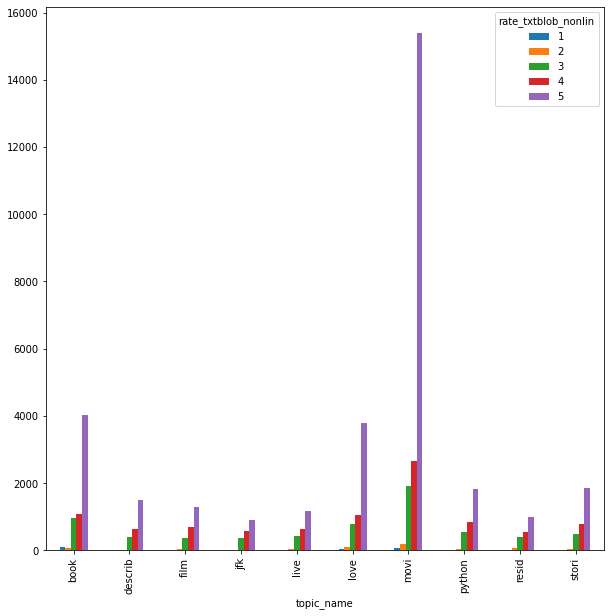

In [35]:
fig = graph_results.plot.bar(rot=90, figsize=(10,10))
fig.figure.savefig('sentiment_analysis.png', bbox_inches='tight')

## LDA evaluation and visualization

In [36]:
pyLDAvis.sklearn.prepare(lda_model, vectorised , vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.151498  0.020275       1        1  19.760080
0      0.032634  0.009568       2        1  11.401946
9     -0.000020  0.037941       3        1  10.799418
8     -0.050399  0.111669       4        1  10.737587
4     -0.011312 -0.002114       5        1   9.617555
1      0.067383 -0.055287       6        1   8.880662
5     -0.040944  0.000768       7        1   8.232212
2     -0.070010 -0.028988       8        1   7.612514
3     -0.029032 -0.034872       9        1   6.989647
7     -0.049799 -0.058959      10        1   5.968380, topic_info=            Term          Freq         Total Category  logprob  loglift
442295      movi  38496.000000  38496.000000  Default  30.0000  30.0000
403206      love   3221.000000   3221.000000  Default  29.0000  29.0000
734908     watch  10037.000000  10037.000000  Default  28.0000  28.0000
250996      film  15858.000000  15858.000000  Default  27.0000  27.0000
115833   classic   4648.000000   4648.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
350026  interest    114.488819   1841.680483  Topic10  -7.1139   0.0407
761006     young    102.466083   1315.572567  Topic10  -7.2248   0.2662
4526         act    110.560568   2664.458302  Topic10  -7.1488  -0.3635
395699      live    105.261451   1841.090523  Topic10  -7.1979  -0.0430
5898      action    103.534586   2065.282691  Topic10  -7.2145  -0.1744

[877 rows x 6 columns], token_table=        Topic      Freq     Term
term                            
1175        1  0.333926  absolut
1175        2  0.087686  absolut
1175        3  0.081680  absolut
1175        4  0.070869  absolut
1175        5  0.070869  absolut
...       ...       ...      ...
762843      6  0.034419    zombi
762843      7  0.050617    zombi
762843      8  0.008099    zombi
762843      9  0.018222    zombi
762843     10  0.362414    zombi

[2976 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 10, 9, 5, 2, 6, 3, 4, 8])

## Textblob evaluation and visualization

### Textblob vis

In [37]:
# we are going to evaluate overall performance of Textblob library:
# re naming :
init_ratings = scores
labels = label_txtblob  # Lable = negative, nuetral, positive
#rate_txtblob_linear  # {1,2,3,4,5} using linear mapping 
#rate_txtblob_nonlin
#print(init_ratings)

N = len(scores) # totla number of reviews 

def evaluator(init, labels):
  corrects=0
  lenght = len(init)
  if(lenght!=len(labels)):
    return -1
  for i in range(lenght):
    if( (init[i]==5 or init[i]==4) and (labels[i]=='Positive')  ):
      corrects+=1
    elif( ( init[i]==3 ) and (labels[i]=='Neutral')  ):
      corrects+=1
    elif( (init[i]==1 or init[i]==2) and (labels[i]=='Negative')  ):
      corrects+=1 
  return corrects

def evaluator_rating(init, labels): 
  corrects=0
  lenght = len(init)
  if(lenght!=len(labels)):
    return -1
  for i in range(lenght):
    if labels[i]==init[i]:
      corrects+=1
  return corrects


In [38]:
correctNumber = evaluator(init_ratings,labels)
OverllAccuracyTextblob = round((correctNumber/N),5)
print(OverllAccuracyTextblob)

0.80062


In [39]:
correctNumber_rating = evaluator_rating(init_ratings,rate_txtblob_nonlin)
OverllAccuracyTextblob_rating = round((correctNumber_rating/N),5)
print(OverllAccuracyTextblob_rating)

0.58455
